In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def arrival(queue, t):    
    queue.append(t)

def attend(queue, t):    
    t_wait = t - queue[0]
    queue.pop(0)
    
    return t_wait

def bored(queue, t):    
    t_wait = t - queue[0]
    queue.pop(-1)
    
    return t_wait

In [3]:
arr_1 = 1.0/5.0 
arr_2 = 1.0/2.0 
asst = 1.0/2.0 
bor = 1.0/10.0

In [4]:
p0 = 0
p_lost0 = 0

def DG(t_old, p_old, p_atend_old, p_lost_old, totalWait_old, queue):
    
    K = 0.0
    Dt = log(1.0/random.random())
    w = random.random()
    
    p_new = p_old
    p_atend_new = p_atend_old
    p_lost_new = p_lost_old
    totalWait = totalWait_old
    
    
    #9--17
    if(t_old < 480):
        K += arr_1
         
        if(p_old > 0):            
            K += asst
               
            if(p_old > 10):              
                K += bor                
                Dt/=K
                t_new = t_old + Dt
                
                if(w < arr_1/K):
                    p_new+=1
                    arrival(queue, t_new)
                
                elif(w >= arr_1/K and w < (arr_1 + asst)/K):
                    p_new-=1
                    p_atend_new+=1
                    totalWait+=attend(queue, t_new)
                
                else:
                    p_new-=1
                    p_lost_new+=1
                    totalWait+=bored(queue, t_new)
                       
            
            else:               
                Dt/=K
                t_new = t_old + Dt
                
                if(w < arr_1/K):
                    p_new+=1
                    arrival(queue, t_new)
                
                else:
                    p_new-=1
                    p_atend_new+=1
                    totalWait+=attend(queue, t_new)
                    
        
        else:        
            
            Dt/=K
            t_new = t_old + Dt
            p_new+=1
            arrival(queue, t_new)
                               
    #17--19 
    else:           
        K += arr_2
        
        if(p_old > 0):   
            K += asst
            
            if(p_old > 10):        
                K += bor                
                Dt/=K
                t_new = t_old + Dt
                
                if(w < arr_2/K):
                    p_new+=1
                    arrival(queue, t_new)
                
                elif(w >= arr_2/K and w < (arr_2 + asst)/K):
                    p_new-=1
                    p_atend_new+=1
                    totalWait+=attend(queue, t_new)
                
                else:
                    p_new-=1
                    p_lost_new+=1
                    totalWait+=bored(queue, t_new)
            
            else:
                
                Dt/=K
                t_new = t_old + Dt
                if(w < arr_2/K):
                    p_new+=1
                    arrival(queue, t_new)
                
                else:
                    p_new-=1
                    p_atend_new+=1
                    totalWait+=attend(queue, t_new)
        else:
            
            Dt/=K
            t_new = t_old + Dt
            p_new+=1
            arrival(queue, t_new)
                
    return t_new, p_new, p_atend_new, p_lost_new, totalWait

In [5]:
def clerk(dt, t_total):
    
    t = []
    p = []
    p_atend = []
    p_lost = []
    totalT = []    
    queue = []
    
    t_c = 0
    p_c = p0
    p_atend_c = 0
    p_lost_c = p_lost0
    totalT_c = 0
    
    t.append(0)
    p.append(p0)
    p_atend.append(0)
    p_lost.append(p_lost0)
    totalT.append(0)
    
    while t_c < t_total:        
        t_c, p_c, p_atend_c, p_lost_c, totalT_c = DG(t_c, p_c, p_atend_c, p_lost_c, totalT_c, queue)        
        t.append(t_c)
        p.append(p_c)
        p_atend.append(p_atend_c)
        p_lost.append(p_lost_c)
        totalT.append(totalT_c)
    
    avgT = 1.0*np.array(totalT)/(1.0*np.array(p_atend) + 1.0*np.array(p_lost))

    return t, p, p_lost, avgT

In [6]:
totalTime = 600
dt = 1
N = 10000
T = []

for i in range(N):
        t, p, p_lost, avgT = clerk(dt, totalTime)
        T.append(avgT[-1])

/opt/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide


El tiempo promedio de espera en la queue son 5.79 minutos.


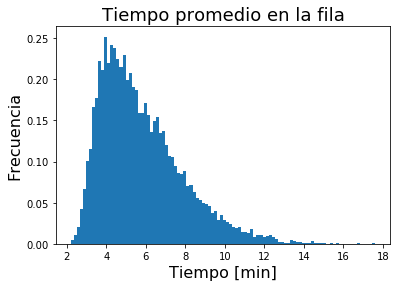

In [10]:
print('El tiempo promedio de espera en la queue son ' + str(round(mean(T),2)) + ' minutos.')

xlabel('Tiempo [min]',fontsize=16)
ylabel('Frecuencia',fontsize=16)
title('Tiempo promedio en la fila',fontsize=18)
hist(T,normed=True,bins=100)
show()

In [8]:
def month():

    lostCostumer = 0

    for i in range(30):
        dt = 1
        t_total = 600
        tList, pList, pLostList, avgWaitTime = clerk(dt, t_total)
        lostCostumer += pLostList[-1]
    
    return lostCostumer

In [9]:
lostCostumerList = []
    
for i in range(1000):
        lostCostumerList.append(month())

/opt/Anaconda/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:30: RuntimeWarning: invalid value encountered in true_divide


La cantidad promedio de clientes que se pierden por mes es de 42.35


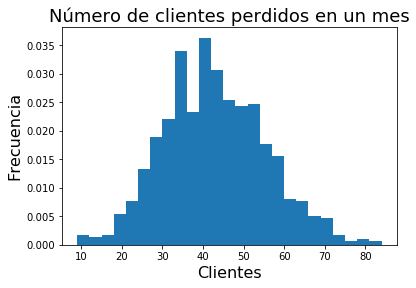

In [11]:
print('La cantidad promedio de clientes que se pierden por mes es de ' + str(round(mean(lostCostumerList),2)))

xlabel('Clientes',fontsize=16)
ylabel('Frecuencia',fontsize=16)
title('Número de clientes perdidos en un mes',fontsize=18)
hist(lostCostumerList,normed=True,bins=25)
show()